In [1]:
import zipfile

# Download data
!wget https://github.com/asreddyIITB/ml/raw/main/ECG_Classification/Kaggle_ECG_dataset/MIT-BIH/mitbih_train.csv.zip

zip_ref = zipfile.ZipFile("mitbih_train.csv.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-21 04:46:36--  https://github.com/asreddyIITB/ml/raw/main/ECG_Classification/Kaggle_ECG_dataset/MIT-BIH/mitbih_train.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/asreddyIITB/ml/main/ECG_Classification/Kaggle_ECG_dataset/MIT-BIH/mitbih_train.csv.zip [following]
--2022-03-21 04:46:36--  https://raw.githubusercontent.com/asreddyIITB/ml/main/ECG_Classification/Kaggle_ECG_dataset/MIT-BIH/mitbih_train.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69854147 (67M) [application/zip]
Saving to: â€˜mitbih_train.csv.zipâ€™

mitbih_train.csv.zi 100%[===================>]  66.62M

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

In [3]:
df_mitbih = pd.read_csv('mitbih_train.csv')

In [4]:
df_mitbih.head()

9.779411554336547852e-01  9.264705777168273926e-01  \
0                  0.960114                  0.863248   
1                  1.000000                  0.659459   
2                  0.925414                  0.665746   
3                  0.967136                  1.000000   
4                  0.927461                  1.000000   

   6.813725233078002930e-01  2.450980395078659058e-01  \
0                  0.461538                  0.196581   
1                  0.186486                  0.070270   
2                  0.541436                  0.276243   
3                  0.830986                  0.586854   
4                  0.626943                  0.193437   

   1.544117629528045654e-01  1.911764740943908691e-01  \
0                  0.094017                  0.125356   
1                  0.070270                  0.059459   
2                  0.196133                  0.077348   
3                  0.356808                  0.248826   
4                  0.094991                  0.072539   

   1.519607901573181152e-01  8.578431606292724609e-02  \
0                  0.099715                  0.088319   
1                  0.056757                  0.043243   
2                  0.071823                  0.060773   
3                  0.145540                  0.089202   
4                  0.043178                  0.053541   

   5.882352963089942932e-02  4.901960864663124084e-02  \
0                  0.074074                  0.082621   
1                  0.054054                  0.045946   
2                  0.066298                  0.058011   
3                  0.117371                  0.150235   
4                  0.093264                  0.189983   

   4.411764815449714661e-02  6.127450987696647644e-02  \
0                  0.074074                  0.062678   
1                  0.056757                  0.043243   
2                  0.063536                  0.082873   
3                  0.131455                  0.122066   
4                  0.328152                  0.417962   

   6.617647409439086914e-02  6.127450987696647644e-02.1  \
0                  0.065527                    0.065527   
1                  0.067568                    0.062162   
2                  0.085635                    0.093923   
3                  0.140845                    0.159624   
4                  0.426598                    0.442142   

   4.901960864663124084e-02.1  7.352941483259201050e-02  \
0                    0.062678                  0.076923   
1                    0.078378                  0.072973   
2                    0.113260                  0.124309   
3                    0.150235                  0.145540   
4                    0.433506                  0.435233   

   6.127450987696647644e-02.2  6.127450987696647644e-02.3  \
0                    0.071225                    0.082621   
1                    0.086486                    0.081081   
2                    0.140884                    0.132597   
3                    0.136150                    0.169014   
4                    0.449050                    0.435233   

   6.617647409439086914e-02.1  6.862745434045791626e-02  \
0                    0.091168                  0.096866   
1                    0.108108                  0.110811   
2                    0.140884                  0.091160   
3                    0.178404                  0.173709   
4                    0.402418                  0.404145   

   9.558823704719543457e-02  7.598039507865905762e-02  \
0                  0.082621                  0.082621   
1                  0.135135                  0.135135   
2                  0.085635                  0.074586   
3                  0.183099                  0.201878   
4                  0.405872                  0.390328   

   9.313725680112838745e-02  1.053921580314636230e-01  \
0                  0.091168                  0.105413   
1                  0.170270                  0.183784   

In [5]:
df_mitbih = pd.read_csv('mitbih_train.csv', header=None)

In [6]:
df_mitbih.dtypes.to_frame().T

0        1        2        3        4        5        6        7    \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       8        9        10       11       12       13       14       15   \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       16       17       18       19       20       21       22       23   \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       24       25       26       27       28       29       30       31   \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       32       33       34       35       36       37       38       39   \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       40       41       42       43       44       45       46       47   \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       48       49   ...      138      139      140      141      142  \
0  float64  float64  ...  float64  float64  float64  float64  float64   

       143      144      145      146      147      148      149      150  \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       151      152      153      154      155      156      157      158  \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       159      160      161      162      163      164      165      166  \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       167      168      169      170      171      172      173      174  \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       175      176      177      178      179      180      181      182  \
0  float64  float64  float64  float64  float64  float64  float64  float64   

       183      184      185      186      187  
0  float64  float64  float64  float64  float64  

[1 rows x 188 columns]

In [7]:
## class labels are in last column
df_mitbih[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [8]:
len(df_mitbih[187])

87554

**Dataset -- Information**

1. Number of Samples: 87554
2. Sampling Frequency: 125Hz
3. Data Source: Physionet's MIT-BIH Arrhythmia Dataset
4. Number of Categories: 5
5. Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

>N : Non-ecotic beats (normal beat) S : Supraventricular ectopic beats V : Ventricular ectopic beats F : Fusion Beats Q : Unknown Beats





In [9]:
from sklearn.utils import shuffle
df_mitbih = shuffle(df_mitbih, random_state=42)

In [10]:
df_mitbih.columns = ['feature_' + str(col) for col in df_mitbih.columns]
df_mitbih.rename(columns={'feature_187': 'labels'}, inplace=True)

In [11]:
df_mitbih['labels'] = df_mitbih['labels'].astype(int)

In [12]:
df_mitbih.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
10563   0.965812   0.792023   0.116809   0.000000   0.162393   0.213675   
25843   1.000000   0.597015   0.000000   0.109453   0.094527   0.084577   
15891   0.831382   0.714286   0.491803   0.206089   0.086651   0.042155   
62606   1.000000   0.837705   0.236066   0.037705   0.252459   0.329508   
84283   0.868590   0.448718   0.490385   0.477564   0.461538   0.455128   

       feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
10563   0.264957   0.247863   0.270655   0.259259    0.284900    0.284900   
25843   0.074627   0.094527   0.114428   0.124378    0.099502    0.119403   
15891   0.032787   0.025761   0.046838   0.032787    0.037471    0.030445   
62606   0.319672   0.306557   0.304918   0.306557    0.316393    0.318033   
84283   0.416667   0.304487   0.182692   0.000000    0.057692    0.105769   

       feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
10563    0.301994    0.282051    0.316239    0.316239    0.336182    0.333333   
25843    0.099502    0.124378    0.099502    0.119403    0.129353    0.134328   
15891    0.046838    0.030445    0.063232    0.060890    0.067916    0.079625   
62606    0.314754    0.311475    0.316393    0.319672    0.318033    0.314754   
84283    0.096154    0.131410    0.195513    0.153846    0.144231    0.121795   

       feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
10563    0.350427    0.367521    0.410256    0.424501    0.444444    0.447293   
25843    0.139303    0.124378    0.129353    0.139303    0.134328    0.144279   
15891    0.119438    0.138173    0.166276    0.173302    0.213115    0.229508   
62606    0.319672    0.319672    0.313115    0.316393    0.327869    0.327869   
84283    0.131410    0.125000    0.134615    0.131410    0.128205    0.121795   

       feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
10563    0.475783    0.484330    0.470085    0.450142    0.444444    0.415954   
25843    0.144279    0.129353    0.129353    0.109453    0.084577    0.079602   
15891    0.250585    0.243560    0.257611    0.229508    0.217799    0.182670   
62606    0.322951    0.327869    0.332787    0.336066    0.334426    0.324590   
84283    0.134615    0.125000    0.134615    0.125000    0.137821    0.137821   

       feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
10563    0.401709    0.361823    0.353276    0.324786    0.321937    0.310541   
25843    0.079602    0.064677    0.074627    0.069652    0.064677    0.064677   
15891    0.189696    0.161592    0.168618    0.140515    0.156909    0.159251   
62606    0.337705    0.344262    0.345902    0.340984    0.354098    0.357377   
84283    0.153846    0.169872    0.179487    0.192308    0.205128    0.227564   

       feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
10563    0.321937    0.310541    0.313390    0.304843    0.304843    0.299145   
25843    0.064677    0.054726    0.049751    0.069652    0.059701    0.064677   
15891    0.168618    0.152225    0.156909    0.142857    0.154567    0.154567   
62606    0.354098    0.357377    0.363934    0.362295    0.357377    0.357377   
84283    0.259615    0.269231    0.282051    0.288462    0.288462    0.294872   

       feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
10563    0.316239    0.313390    0.327635    0.316239    0.324786    0.307692   
25843    0.049751    0.059701    0.049751    0.064677    0.054726    0.059701   
15891    0.173302    0.149883    0.149883    0.145199    0.154567    0.149883   
62606    0.357377    0.359016    0.344262    0.324590    0.319672    0.311475   
84283    0.285256    0.272436    0.272436    0.259615    0.253205    0.240385   

       feature_48  feature_49  ...  feature_138  feature_139  feature_140  \
10563    0.333333    0.341880  ...          0.0          0.0          0.0   
25843    0.044776

# Create a validation set containing 60 samples of each label. (approx 10% of label: 3 data)

In [13]:
df_mitbih_validation = df_mitbih.groupby('labels').head(60)

In [14]:
df_mitbih_validation['labels'].value_counts()

0    60
4    60
1    60
2    60
3    60
Name: labels, dtype: int64

In [15]:
df_mitbih_train = df_mitbih[~df_mitbih.index.isin(df_mitbih_validation.index.values.tolist())]

In [16]:
df_mitbih_train['labels'].value_counts()

0    72411
4     6371
2     5728
1     2163
3      581
Name: labels, dtype: int64

Text(0.5, 1.0, 'label 0')

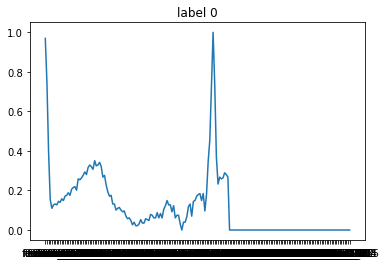

In [ ]:
 plt.plot(df_mitbih_train[df_mitbih_train['labels'] == 0].iloc[0,:186])
 plt.title('label 0')

Text(0.5, 1.0, 'label 1')

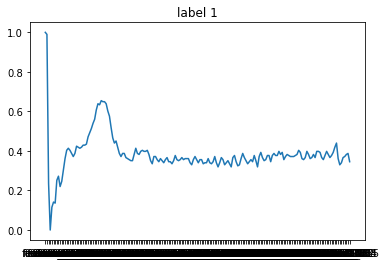

In [ ]:
plt.plot(df_mitbih_train[df_mitbih_train['labels'] == 1].iloc[0,:186])
plt.title('label 1')

Text(0.5, 1.0, 'label 2')

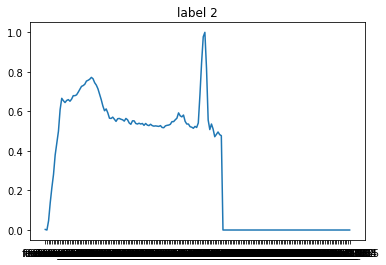

In [ ]:
plt.plot(df_mitbih_train[df_mitbih_train['labels'] == 2].iloc[0,:186])
plt.title('label 2')

Text(0.5, 1.0, 'label 3')

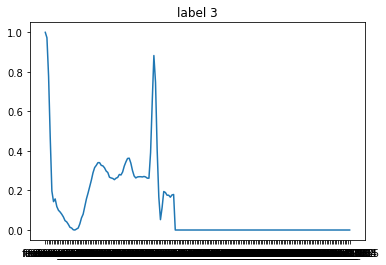

In [ ]:
plt.plot(df_mitbih_train[df_mitbih_train['labels'] == 3].iloc[0,:186])
plt.title('label 3')

Text(0.5, 1.0, 'label 4')

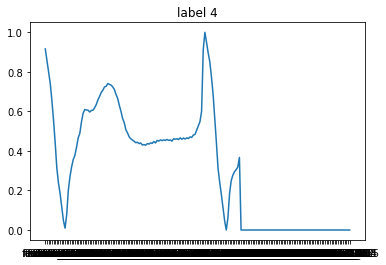

In [ ]:
plt.plot(df_mitbih_train[df_mitbih_train['labels'] == 4].iloc[0,:186])
plt.title('label 4')

In [17]:
df_mitbih_train = shuffle(df_mitbih_train, random_state=42)
X_train = df_mitbih_train.iloc[:, :187]
Y_train = df_mitbih_train['labels']

In [18]:
X_valid = df_mitbih_validation.iloc[:, :187]
Y_valid = df_mitbih_validation['labels']

In [ ]:
feature_corr = X_train.corr()
feature_corr

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
feature_0     1.000000   0.778324   0.140513  -0.135548  -0.244780  -0.353717   
feature_1     0.778324   1.000000   0.501499  -0.024774  -0.148862  -0.164998   
feature_2     0.140513   0.501499   1.000000   0.671715   0.401320   0.345476   
feature_3    -0.135548  -0.024774   0.671715   1.000000   0.819513   0.595946   
feature_4    -0.244780  -0.148862   0.401320   0.819513   1.000000   0.881530   
...                ...        ...        ...        ...        ...        ...   
feature_182  -0.035077  -0.008692  -0.028850  -0.041214  -0.012779   0.008043   
feature_183  -0.035718  -0.010201  -0.030206  -0.042942  -0.015488   0.005755   
feature_184  -0.035552  -0.010733  -0.031203  -0.043562  -0.016258   0.004193   
feature_185  -0.033868  -0.010137  -0.032857  -0.045432  -0.019792  -0.000052   
feature_186  -0.032940  -0.010036  -0.034524  -0.046933  -0.021201  -0.001599   

             feature_6  feature_7  feature_8  feature_9  feature_10  \
feature_0    -0.431554  -0.480717  -0.522328  -0.560050   -0.575497   
feature_1    -0.234384  -0.285130  -0.322549  -0.341089   -0.336198   
feature_2     0.281151   0.206458   0.138847   0.078050    0.032025   
feature_3     0.474961   0.388414   0.292303   0.199400    0.118534   
feature_4     0.750105   0.663607   0.563262   0.448557    0.343898   
...                ...        ...        ...        ...         ...   
feature_182   0.007185   0.016386   0.023347   0.016325    0.017701   
feature_183   0.005332   0.015278   0.023205   0.016177    0.017129   
feature_184   0.003762   0.013895   0.022556   0.015342    0.015993   
feature_185  -0.000036   0.010733   0.020374   0.012901    0.013357   
feature_186  -0.001333   0.009929   0.020212   0.012744    0.013268   

             feature_11  feature_12  feature_13  feature_14  feature_15  \
feature_0     -0.581334   -0.582486   -0.583354   -0.585404   -0.588987   
feature_1     -0.339532   -0.351945   -0.353776   -0.358075   -0.364935   
feature_2     -0.003812   -0.027198   -0.039612   -0.033826   -0.025337   
feature_3      0.072782    0.046724    0.034682    0.046085    0.069566   
feature_4      0.280132    0.249288    0.230222    0.240220    0.262411   
...                 ...         ...         ...         ...         ...   
feature_182    0.028894    0.042472    0.049805    0.048050    0.044770   
feature_183    0.028541    0.042316    0.049825    0.048181    0.045002   
feature_184    0.027623    0.042216    0.050005    0.048402    0.045201   
feature_185    0.025087    0.040339    0.048746    0.047320    0.044067   
feature_186    0.025087    0.040542    0.049007    0.047683    0.044349   

             feature_16  feature_17  feature_18  feature_19  feature_20  \
feature_0     -0.590829   -0.591596   -0.591094   -0.590897   -0.589849   
feature_1     -0.373246   -0.376853   -0.382599   -0.387041   -0.393555   
feature_2     -0.022040   -0.025271   -0.030377   -0.038814   -0.045243   
feature_3      0.080531    0.082378    0.077724    0.073373    0.069637   
feature_4      0.275203    0.274669    0.270206    0.264201    0.261947   
...                 ...         ...         ...         ...         ...   
feature_182    0.042764    0.041322    0.039145    0.037272    0.035327   
feature_183    0.042940    0.041489    0.039408    0.037648    0.035784   
feature_184    0.043260    0.041749    0.039747    0.038016    0.036268   
feature_185    0.042465    0.040998    0.039237    0.037499    0.035963   
feature_186    0.042789    0.041117    0.039441    0.037702    0.036230   

             feature_21  feature_22  feature_23  feature_24  feature_25  \
feature_0     -0.589497   -0.589296   -0.589734   -0.590436   -0.592791   
feature_1     -0.397467   -0.404056   -0.408456   -0.414015   -0.417835   
feature_2     -0.052490   -0.058047   -0.064849   -0.068570   -0.072549   
feature_3      0.067571    0.065586    0.065665    0.066306    0.068830   
feature_4 

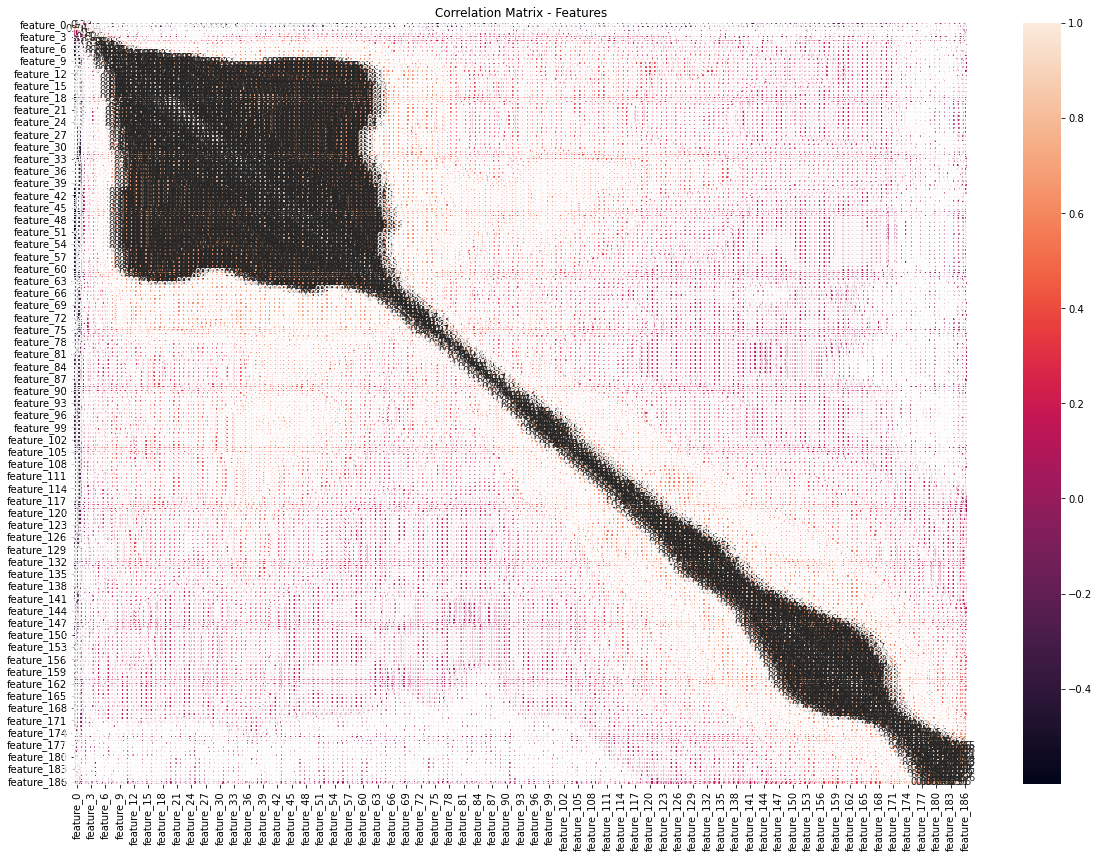

In [ ]:
plt.figure(figsize=(20,14))
ax = plt.axes()
ax.set_title('Correlation Matrix - Features')
ax.set_xlabel("Features", fontsize =15)
ax.set_xticklabels([*range(0,188)])
ax.set_ylabel("Features", fontsize=15)
ax.set_yticklabels([*range(0,188)], rotation = 0)
sns.heatmap(feature_corr, annot=True, ax=ax,)
plt.show()

High Correlation between neighboring features. Has similarilities with time series data!! ðŸ“ˆ

In [19]:
X_train.describe()

feature_0     feature_1     feature_2     feature_3     feature_4  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.890449      0.758225      0.423802      0.218810      0.200891   
std        0.240829      0.221699      0.227209      0.206648      0.176823   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.922012      0.682648      0.250862      0.048366      0.082270   
50%        0.991342      0.825969      0.429338      0.165746      0.147757   
75%        1.000000      0.910448      0.578571      0.341144      0.258746   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          feature_5     feature_6     feature_7     feature_8     feature_9  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.210211      0.205656      0.201653      0.198602      0.196739   
std        0.171758      0.178403      0.177224      0.171796      0.168398   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.088343      0.073210      0.066015      0.064885      0.068581   
50%        0.158690      0.145233      0.144309      0.149813      0.148674   
75%        0.287356      0.298077      0.295265      0.290756      0.283654   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_10    feature_11    feature_12    feature_13    feature_14  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.198813      0.203597      0.208803      0.212897      0.218402   
std        0.171834      0.176515      0.180276      0.184087      0.186948   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.070530      0.069186      0.068306      0.067797      0.070175   
50%        0.145985      0.148608      0.153001      0.156934      0.162694   
75%        0.287906      0.293478      0.303107      0.310924      0.316476   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_15    feature_16    feature_17    feature_18    feature_19  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.224965      0.231372      0.237121      0.242580      0.247930   
std        0.189990      0.193884      0.198448      0.202836      0.207143   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.072993      0.074830      0.075985      0.076923      0.077895   
50%        0.169383      0.174542      0.178032      0.182648      0.187500   
75%        0.321798      0.328352      0.337428      0.347683      0.358118   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_20    feature_21    feature_22    feature_23    feature_24  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.253755      0.259747      0.266240      0.272726      0.279335   
std        0.211163      0.214797      0.218424      0.221458      0.224000   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.079470      0.081915      0.085938      0.090065      0.094595   
50%        0.194595      0.203323      0.212290      0.221656      0.230166   
75%        0.369980      0.380392      0.390530      0.397584      0.404255   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         feature_25    feature_26    feature_27    feature_28    feature_29  \
count  87254.000000  87254.000000  87254.000000  87254.000000  87254.000000   
mean       0.285561      0.291772      0.297628      0.303328      0.308735   
std        0.225815      0.227098      0.227791      0.228393      0.228829   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.098862      0.103943      0.109312      0.

# Model 1: Initial Attempt with LightGBM

In [20]:
import lightgbm as lgb
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

In [21]:
train_data = lgb.Dataset(X_train, label=Y_train)
valid_data = lgb.Dataset(X_valid, label=Y_valid)

In [ ]:
parameters = {'objective': 'multiclassova',
              'metric': 'multi_logloss',
              'is_unbalance': 'true',
              'boosting': 'gbdt',
              'num_classes': 5,
              'num_leaves': 63,
              'feature_fraction': 0.5,
              'bagging_fraction': 0.5,
              'bagging_freq': 20,
              'learning_rate': 0.01,
              'verbose': -1
             }

model_lgbm = lgb.train(parameters,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50, verbose_eval=False)


[1]	valid_0's multi_logloss: 2.51956
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 2.38189
[3]	valid_0's multi_logloss: 2.27544
[4]	valid_0's multi_logloss: 2.18483
[5]	valid_0's multi_logloss: 2.10699
[6]	valid_0's multi_logloss: 2.03842
[7]	valid_0's multi_logloss: 1.97587
[8]	valid_0's multi_logloss: 1.91883
[9]	valid_0's multi_logloss: 1.86821
[10]	valid_0's multi_logloss: 1.82095
[11]	valid_0's multi_logloss: 1.77637
[12]	valid_0's multi_logloss: 1.7353
[13]	valid_0's multi_logloss: 1.69778
[14]	valid_0's multi_logloss: 1.66138
[15]	valid_0's multi_logloss: 1.62723
[16]	valid_0's multi_logloss: 1.59473
[17]	valid_0's multi_logloss: 1.56393
[18]	valid_0's multi_logloss: 1.53634
[19]	valid_0's multi_logloss: 1.50901
[20]	valid_0's multi_logloss: 1.48289
[21]	valid_0's multi_logloss: 1.44686
[22]	valid_0's multi_logloss: 1.41993
[23]	valid_0's multi_logloss: 1.39318
[24]	valid_0's multi_logloss: 1.36892
[25]	valid_0's multi_logloss: 1.3462

In [ ]:
Y_valid_pred = model_lgbm.predict(X_valid)

In [ ]:
Y_valid_pred = [np.argmax(line) for line in Y_valid_pred]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, Y_valid_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.83        60
           1       1.00      0.78      0.88        60
           2       0.87      0.98      0.92        60
           3       1.00      0.70      0.82        60
           4       0.98      0.98      0.98        60

    accuracy                           0.89       300
   macro avg       0.91      0.89      0.89       300
weighted avg       0.91      0.89      0.89       300



In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_valid, Y_valid_pred, average='weighted')

0.886483448634012

# Parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'objective': ['multiclassova'],
              'metric': ['multi_logloss'],
              'is_unbalance': ['true'],
              'boosting': ['gbdt'],
              'num_classes': [5],
              'num_leaves': [7, 15, 31, 63],
              'feature_fraction': [0.33, 0.5, 0.66],
              'bagging_fraction': [0.5],
              'bagging_freq': [20],
              'learning_rate': [0.005, 0.01, 0.025],
              'num_iterations': [50]
             }

lgb_estimator = lgb.LGBMClassifier(verbose_eval=False)

grid_search = GridSearchCV(lgb_estimator, parameter_grid, cv=5)
grid_search.fit(X_train,Y_train)


In [ ]:
grid_search.best_params_

{'bagging_fraction': 0.5,
 'bagging_freq': 20,
 'boosting': 'gbdt',
 'feature_fraction': 0.33,
 'is_unbalance': 'true',
 'learning_rate': 0.025,
 'metric': 'multi_logloss',
 'num_classes': 5,
 'num_iterations': 50,
 'num_leaves': 63,
 'objective': 'multiclassova'}

In [ ]:
#refit with best params for more iterations

model_lgbm = lgb.train(grid_search.best_params_,
                            train_data,
                            valid_sets=valid_data,
                            num_boost_round=5000,
                            early_stopping_rounds=50)

In [ ]:
Y_valid_pred = model_lgbm.predict(X_valid)
Y_valid_pred = [np.argmax(line) for line in Y_valid_pred]

from sklearn.metrics import classification_report
print(classification_report(Y_valid, Y_valid_pred))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        60
           1       1.00      0.78      0.88        60
           2       0.85      0.97      0.91        60
           3       0.98      0.72      0.83        60
           4       0.98      0.98      0.98        60

    accuracy                           0.89       300
   macro avg       0.91      0.89      0.89       300
weighted avg       0.91      0.89      0.89       300



**slight improvement in the metrics!**

#Feature Engineering

In [22]:
X_train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
62224   0.977012   0.931035   0.695402   0.522988   0.298851   0.097701   
65564   0.911392   0.838608   0.142405   0.000000   0.129747   0.240506   
13087   0.853933   0.655431   0.460674   0.262172   0.067416   0.000000   
9556    1.000000   0.789474   0.540670   0.320574   0.071770   0.009569   
77554   0.656000   0.597333   0.410667   0.112000   0.058667   0.024000   

       feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
62224   0.034483   0.074713   0.080460   0.074713    0.080460    0.103448   
65564   0.259494   0.268987   0.250000   0.253165    0.281646    0.306962   
13087   0.037453   0.082397   0.093633   0.082397    0.104869    0.101124   
9556    0.052632   0.129187   0.105263   0.138756    0.129187    0.148325   
77554   0.000000   0.018667   0.056000   0.093333    0.144000    0.178667   

       feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
62224    0.080460    0.086207    0.109195    0.109195    0.126437    0.120690   
65564    0.284810    0.291139    0.272152    0.316456    0.338608    0.357595   
13087    0.104869    0.101124    0.104869    0.119850    0.127341    0.119850   
9556     0.148325    0.177033    0.157895    0.220096    0.200957    0.253589   
77554    0.205333    0.229333    0.240000    0.245333    0.250667    0.258667   

       feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  \
62224    0.132184    0.149425    0.143678    0.120690    0.155172    0.183908   
65564    0.363924    0.389241    0.401899    0.430380    0.433544    0.468354   
13087    0.146067    0.157303    0.176030    0.191011    0.220974    0.247191   
9556     0.248804    0.282297    0.291866    0.349282    0.334928    0.392345   
77554    0.272000    0.282667    0.298667    0.314667    0.346667    0.370667   

       feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
62224    0.160920    0.166667    0.189655    0.218391    0.201149    0.212644   
65564    0.443038    0.471519    0.449367    0.468354    0.430380    0.408228   
13087    0.265918    0.273408    0.322097    0.352060    0.378277    0.400749   
9556     0.401914    0.449761    0.464115    0.521531    0.526316    0.588517   
77554    0.333333    0.376000    0.426667    0.448000    0.498667    0.544000   

       feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
62224    0.229885    0.247126    0.241379    0.229885    0.241379    0.252874   
65564    0.354430    0.335443    0.319620    0.322785    0.300633    0.297468   
13087    0.434457    0.449438    0.460674    0.430712    0.385768    0.333333   
9556     0.607656    0.641148    0.578947    0.511962    0.421053    0.377990   
77554    0.584000    0.608000    0.624000    0.626667    0.624000    0.605333   

       feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  \
62224    0.224138    0.183908    0.172414    0.155172    0.103448    0.074713   
65564    0.275316    0.278481    0.256329    0.278481    0.281646    0.272152   
13087    0.295880    0.262172    0.250936    0.224719    0.213483    0.205993   
9556     0.320574    0.306220    0.244019    0.267943    0.234450    0.244019   
77554    0.586667    0.544000    0.522667    0.485333    0.450667    0.408000   

       feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
62224    0.063218    0.068966    0.051724    0.045977    0.063218    0.063218   
65564    0.268987    0.294304    0.275316    0.329114    0.300633    0.310127   
13087    0.209738    0.205993    0.217228    0.209738    0.205993    0.217228   
9556     0.210526    0.258373    0.234450    0.244019    0.224880    0.263158   
77554    0.389333    0.368000    0.365333    0.344000    0.354667    0.349333   

       feature_48  feature_49  ...  feature_137  feature_138  feature_139  \
62224    0.040230    0.034483  ...     0.183908     0.206897     0.218391   
65564    0.310127

In [ ]:
for i in range(0,186):
  X_train[f"feature_{i+1}_{i}"] = X_train[f"feature_{i+1}"] - X_train[f"feature_{i}"]
  X_valid[f"feature_{i+1}_{i}"] = X_valid[f"feature_{i+1}"] - X_valid[f"feature_{i}"]


for i in range(0,185):
  X_train[f"feature_{i+2}_{i+1}_{i}"] = X_train[f"feature_{i+2}"] + X_train[f"feature_{i}"] - 2.0 * X_train[f"feature_{i+1}"]
  X_valid[f"feature_{i+2}_{i+1}_{i}"] = X_valid[f"feature_{i+2}"] + X_valid[f"feature_{i}"] - 2.0 * X_valid[f"feature_{i+1}"]


In [24]:
train_data = lgb.Dataset(X_train, label=Y_train)
valid_data = lgb.Dataset(X_valid, label=Y_valid)

In [29]:
params = {'bagging_fraction': 0.5,
 'bagging_freq': 20,
 'boosting': 'gbdt',
 'feature_fraction': 0.33,
 'is_unbalance': 'true',
 'learning_rate': 0.025,
 'metric': 'multi_logloss',
 'num_classes': 5,
 'num_leaves': 63,
 'objective': 'multiclassova'}

In [30]:
model_lgbm = lgb.train(params,
                        train_data,
                        valid_sets=valid_data,
                        num_boost_round=5000,
                        early_stopping_rounds=50, verbose_eval=False)

In [31]:
Y_valid_pred = model_lgbm.predict(X_valid)
Y_valid_pred = [np.argmax(line) for line in Y_valid_pred]

from sklearn.metrics import classification_report
print(classification_report(Y_valid, Y_valid_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        60
           1       1.00      0.82      0.90        60
           2       0.90      1.00      0.94        60
           3       1.00      0.70      0.82        60
           4       1.00      0.98      0.99        60

    accuracy                           0.90       300
   macro avg       0.92      0.90      0.90       300
weighted avg       0.92      0.90      0.90       300



### Yay improvement in results!!!!